In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [16]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [19]:
model=DecisionTreeClassifier(max_depth=1)

In [20]:
classifier=AdaBoostClassifier(estimator=model,n_estimators=50,learning_rate=1.0,random_state=42)

classifier.fit(X_train,y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.9

<Axes: >

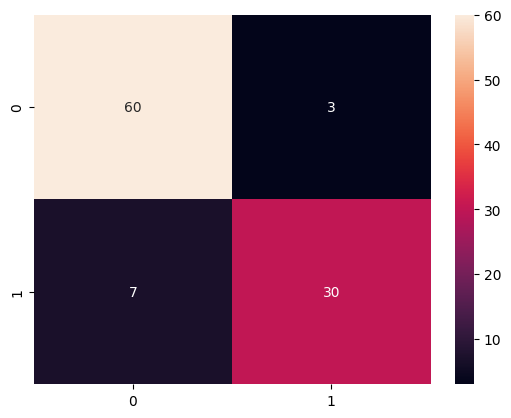

In [22]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [25]:
classifier=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

classifier.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [26]:
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.88

<Axes: >

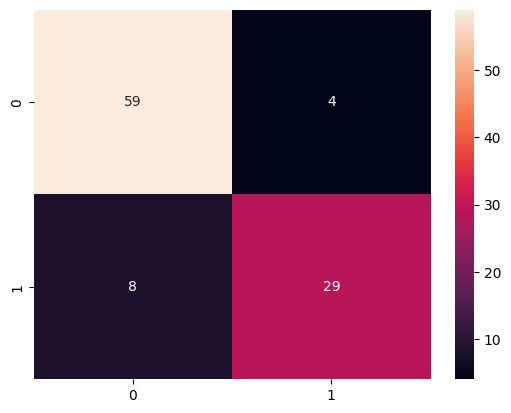

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [32]:
from xgboost import XGBClassifier

In [36]:
classifier=XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

classifier.fit(X_train,y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:14:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [37]:
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.93

<Axes: >

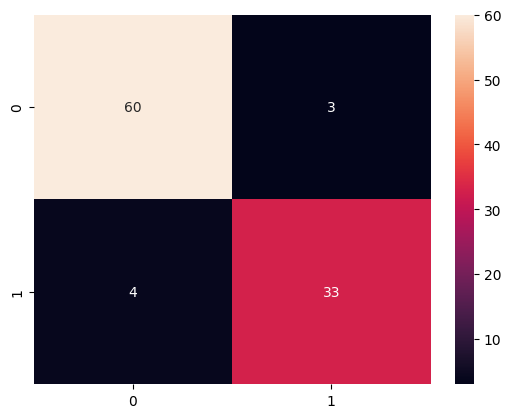

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')